# **SVM은 특성의 스케일에 민감**

C : 낮을수록 마진오류가 커짐 (도로가 넓어짐)

In [1]:
# 파이썬 ≥3.5 필수

import sys

assert sys.version_info >= (3, 5)


# 사이킷런 ≥0.20 필수

import sklearn

assert sklearn.__version__ >= "0.20"


# 공통 모듈 임포트

import numpy as np

import os


# 노트북 실행 결과를 동일하게 유지하기 위해

np.random.seed(42)


# 깔끔한 그래프 출력을 위해

%matplotlib inline

import matplotlib as mpl

import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)

mpl.rc('xtick', labelsize=12)

mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치

PROJECT_ROOT_DIR = "."

CHAPTER_ID = "svm"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)

  print("그림 저장:", fig_id)

  if tight_layout:

    plt.tight_layout()

  
  plt.savefig(path, format=fig_extension, dpi=resolution)



In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"]==2).astype(np.float64)

svm_clf = Pipeline([
                    ("scaler",StandardScaler()),
                    ("linear_svc",LinearSVC(C=1, loss="hinge")),
                     
])

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
svm_clf.predict([[5.5,1.7]])

array([1.])

# 비선형분류

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise = 0.15, random_state=42)



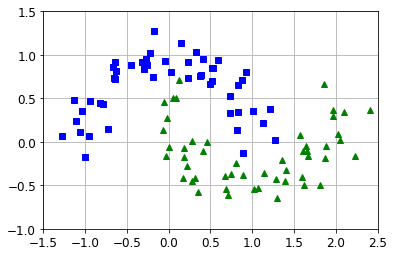

In [5]:
def plot_dataset(X, y, axes):
  plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
  plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")
  plt.axis(axes)
  plt.grid(True, which="both")

plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
          ("poly_features", PolynomialFeatures(degree=3)),
          ("scaler", StandardScaler()),
          ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42)),    
  ])

polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

그림 저장: moons_polynomial_svc_plot


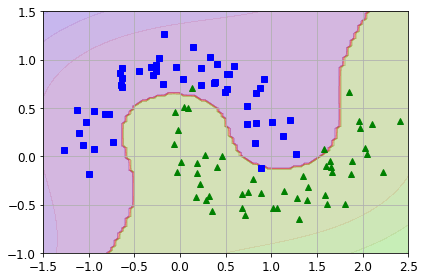

In [7]:
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s) # x0s, x1s의 모든 좌표들을 구함
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0,x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  # 1,0 예측 구분선
  plt.contourf(x0,x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
  # 결선 점수 등고선

plot_predictions(polynomial_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

# PolynomialFeatures는 복잡한 특성 표현 가능하지만 시간이 오래걸림
# 특성 수가 많지않은(복잡하지 않은) 데이터 셋이라면 커널 트릭을 사용하는 것이 더 빠른 결과를 보여줌



In [12]:
# 커널 트릭
# kernel = 'poly'
# (gamma * <x, x'> + coef0)^degree
# gamma = 'scale' 1/(특성개수*데이터분산산

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [14]:
# 3차항과 10차항, 절편 차이를 두고 비교

poly100_kernel_svm_clf = Pipeline([

  ("scaler", StandardScaler()),

  ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))

])

poly100_kernel_svm_clf.fit(X, y)



Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

그림 저장: moons_kernelized_polynomial_svc_plot


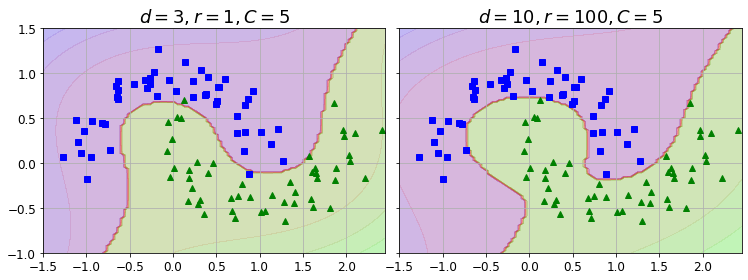

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5,4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5,2.45,-1,1.5])
plot_dataset(X,y, [-1.5,2.45,-1,1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5,2.45,-1,1.5])
plot_dataset(X,y, [-1.5,2.45,-1,1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

# 가우시안 RBF 커널

그림 저장: moons_rbf_svc_plot


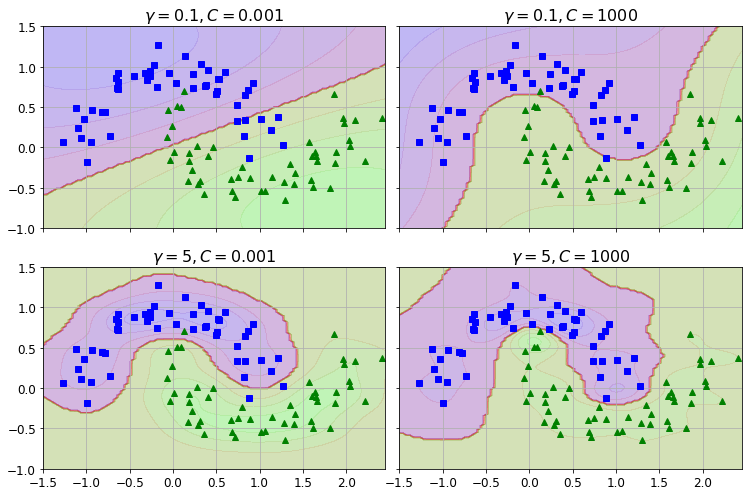

In [16]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
  rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))                                 
  ])
  rbf_kernel_svm_clf.fit(X,y)
  svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5,7), sharex=True,
                         sharey=True)
for i, svm_clf in enumerate(svm_clfs):
  plt.sca(axes[i // 2, i % 2])

  plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])

  plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

  gamma, C = hyperparams[i]

  plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

  if i in (0, 1):

    plt.xlabel("")

  if i in (1, 3):

      plt.ylabel("")


save_fig("moons_rbf_svc_plot")

plt.show()



# SVM 회귀
일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 최대가 되도록 함


In [17]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)